<font size="6"><strong><center>MRM Interview Challenge </center></strong></font> 

<br>

<font size="4"><strong><center> —— Chevy BYO tool </center></strong></font> 

<center><span style="font-family: Arial;font-size:1.2em">Rochelle Liu</center>
<center><span style="font-family: Arial;font-size:1.2em">2022-4-17</center>

### 1. Frame the problem — EDA only

- How can engagement with the BYO tool be measured, given the data available?
- How did the BYO tool perform after the update, compared to before the update?
- Are there any additional observations or inferences that are notable based on your analysis?

In [2]:
#import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Get data
This step will help the analyst to get the statstical info of the dataset, and move forward with some basics of it.

In [3]:
#getting the data
raw_data = pd.read_csv("Sample Case - Data.csv")
df = pd.DataFrame(raw_data) #shortened by using the variable name "df"

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           730 non-null    object 
 1   BYO Starts     728 non-null    float64
 2   BYO Completes  729 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.2+ KB


*Note*: A few missing values are observed.

In [21]:
df.head()

,Date,BYO Starts,BYO Completes
0,1/1/2016,64665.0,29057.0
1,1/2/2016,67037.0,29977.0
2,1/3/2016,70994.0,31850.0
3,1/4/2016,66300.0,29172.0
4,1/5/2016,65346.0,28936.0


Three columns are all numerical, including dates. We will handle dates in the next step.

In [22]:
df.describe()

,BYO Starts,BYO Completes
count,728.000000,729.000000
mean,72357.424451,32634.198903
std,6953.376995,4124.505785
min,54855.000000,21372.000000
25%,67385.500000,29466.000000
50%,71592.500000,32681.000000
75%,76397.500000,35574.000000
max,104383.000000,47677.000000


In [55]:
df.isnull().sum()

Date             0
BYO Starts       2
BYO Completes    1
dtype: int64

In [56]:
#drop all the rows with missing values
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           728 non-null    object 
 1   BYO Starts     728 non-null    float64
 2   BYO Completes  728 non-null    float64
dtypes: float64(2), object(1)
memory usage: 22.8+ KB


<b>To clean the data :</b> All the missing values are removed, since the missing value is less than 1% of the overall dataset. 

### 3. Explore and visualize

In [5]:
#using "Mar 1st" for "Early Spring" and set the time as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])
df = df.sort_index()

In [6]:
#split data by date
before_update = df[:'2017-02-28']
after_update = df['2017-03-01':]
print(before_update.shape)
print(after_update.shape)

(425, 3)
(305, 3)


In [7]:
#confirmed the right data with dates
before_update.iloc[-1]

Date             2017-02-28 00:00:00
BYO Starts                   80184.0
BYO Completes                34942.0
Name: 2017-02-28 00:00:00, dtype: object

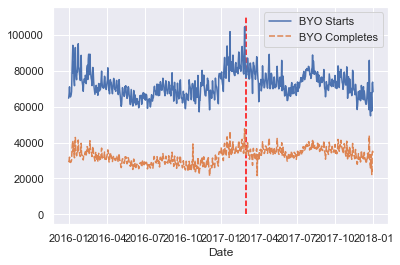

In [8]:
#using seaborn to plot
SC = df[['Date','BYO Starts','BYO Completes']]
sns.set_theme()
sns.lineplot(data=SC).vlines(['2017-03-01'],0,110000, linestyles='dashed', colors='red')

- *Note*: The number of BYO starts started to decrease in the <b>early spring </b> of 2017.

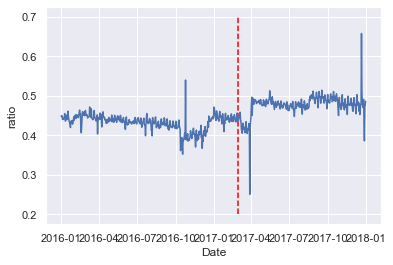

In [9]:
#plot the starts/completes ratio
df["ratio"]= df["BYO Completes"]/df["BYO Starts"]
sns.lineplot(data=df['ratio']).vlines(['2017-03-01'],0.2,0.7, linestyles='dashed', colors='red')

*Note*: There is a decrease around the end of March on the starts/completes ratio. From the data is Mar 28, 2017.
The red line is drawn to help narrowing down the exact date.

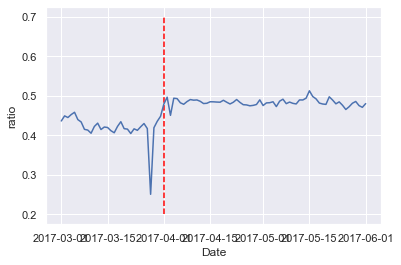

In [52]:
#continuous graph - focus on spring 2017 (Mar 1st to June 1st)
spring = df['2017-03-01':'2017-06-01']
sns.lineplot(data=spring['ratio']).vlines(['2017-04-01'],0.2,0.7, linestyles='dashed', colors='red')

*Note*: There is a noticeable increase of the ratio around the red line. The BYO tool update made a difference.

### Steps and Conclusions:

- To analyze the data, first, I collected the basic information of the dataset by checking the basic stats number, data type and missing value. And got the idea of BYO tool by obeserving the data in graph.

- Second, I cleaned the data and splited the dataset into two based on the assumption of the "early spring" date. Did futher analysis according to the graphs.

- BYO update: An average ratio jumped from around 0.45 to 0.49-0.5, which is roughly around <b>8.8%-11.1%</b>. There was a slight derease in numbers when the BYO tool updated, which was around <b>Mar 1st, 2017</b>. However, there was almost no change on the BYO completes numbers, this affects the overall start/complete ratio to be higher as we obeserved around <b>April 1st, 2017</b>. The BYO tool update did make a difference in terms of increasing the ratio of starts/completes. But the overall completes number did not raise significantly, futher analysis will be needed to add more information to the conclusion.